# Основные понятия машинного обучения

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
* https://contrib.scikit-learn.org/category_encoders/
* https://scikit-learn.org/stable/modules/model_evaluation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* http://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Задачи для совместного разбора

1\. Загрузите набор данных из файла `possum.csv` в виде `pd.DataFrame`. Решите задачу классификации по столбцу `sex`.

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deep Learning/data/possum.csv").drop(columns=["case"]).fillna(0)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["sex"]),
    df["sex"],
    train_size=0.8,
    random_state=42,
)

In [ ]:
# pop = X_train["Pop"]
# tr = ce.OrdinalEncoder().fit(pop)
# tr.transform(pop)


In [ ]:
tr = ColumnTransformer(
    [
        ("anton", ce.OrdinalEncoder(), ["Pop"]),
        ("site", OneHotEncoder(), ["site"])
    ],
    remainder=MinMaxScaler()
).fit(X_train)

In [ ]:
X_train_t = tr.transform(X_train)
# tr.fit(X_test) -- так нельзя!
X_test_t = tr.transform(X_test)

In [ ]:
map = {"m": 0, "f": 1}
y_train_t = y_train.map(map)
y_test_t = y_test.map(map)

In [ ]:
model = RandomForestClassifier(random_state=42).fit(X_train_t, y_train_t)
# model = SVMClassifier(random_state=42).fit(X_train_t, y_train_t)

2\. Проверьте качество обучения модели с использованием перекрестной проверки

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(
    RandomForestClassifier(random_state=42),
    X_train_t,
    y_train_t,
    cv=5,
)

array([0.76470588, 0.41176471, 0.52941176, 0.5       , 0.625     ])

3\. Найдите оптимальные гиперпараметры модели, используя поиск по сетке.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
        "n_estimators": [50, 100, 150, 200],
        "max_depth": [None, 1, 2, 3],
    }
).fit(X_train_t, y_train_t)

In [ ]:
grid.best_params_, grid.best_score_

({'max_depth': 3, 'n_estimators': 150}, 0.6014705882352941)

## Задачи для самостоятельного решения

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 999.7 kB/s eta 0:00:00


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import matplotlib.pyplot as plt
from math import sqrt

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeClassifier, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    f1_score,
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    r2_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<p class="task" id="1"></p>

### 1
Загрузите набор данных из файла `Walmart.csv` в виде `pd.DataFrame`. Преобразуйте столбец `Temperature` в числовой. Преобразуйте столбец `IsHoliday` в числовой столбец, содержащий значения 0 и 1, предварительно проанализировав значения в этом столбце.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/data/Walmart.csv')
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.90,42.31°C,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,12-02-2010,1641957.44,38.51°C,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,Y
2,19-02-2010,1611968.17,39.93°C,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,N
3,26-02-2010,1409727.59,46.63°C,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,n
4,05-03-2010,1554806.68,46.5°C,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


In [ ]:
df['Temperature'] = df['Temperature'].str[:-2].astype(float)
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,12-02-2010,1641957.44,38.51,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,Y
2,19-02-2010,1611968.17,39.93,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,N
3,26-02-2010,1409727.59,46.63,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,n
4,05-03-2010,1554806.68,46.50,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


In [ ]:
df['IsHoliday'].unique()

array(['0', 'Y', 'N', 'n', '-', 'no', 'No', 'y', 'Yes', '1', 'yes'],
      dtype=object)

In [ ]:
map = {"0": 0, "N": 0, "n": 0, "-": 0, "no": 0, "No": 0,
       "1": 1, "Y": 1, "y": 1, "yes": 1, "Yes": 1}
df['IsHoliday'] = df['IsHoliday'].map(map)
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,12-02-2010,1641957.44,38.51,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,1
2,19-02-2010,1611968.17,39.93,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,0
3,26-02-2010,1409727.59,46.63,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,0
4,05-03-2010,1554806.68,46.50,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


<p class="task" id="2"></p>

### 2
Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 для решения задачи регрессии. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Weekly_Sales", "Date"]), # удалил дату так как день недели у наблюдений один и тот же, а температура и месяц вызывают мультиколлинеарность
    df["Weekly_Sales"],
    train_size=0.7,
    random_state=42,
)

In [ ]:
# 1 способ (OneHotEncoder + MinMaxScaler)
tr = ColumnTransformer(
    [
        ("StoreId", OneHotEncoder(), ["StoreId"])
    ],
    remainder=MinMaxScaler()
).fit(X_train)

X_train_1 = tr.transform(X_train).toarray()
X_test_1 = tr.transform(X_test).toarray()
X_train_1

array([[0.        , 0.        , 0.        , ..., 0.00427264, 0.56411731,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.97854837, 0.17251294,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.83993135, 0.24784359,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.87213932, 0.41192256,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03960739, 0.86361894,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.62736827, 0.49214108,
        0.        ]])

In [ ]:
# 2 способ (TargetEncoder + StandardScaler)
tr = ColumnTransformer(
    [
        ("StoreId", ce.TargetEncoder(), ["StoreId"])
    ],
    remainder=StandardScaler()
).fit(X_train, y_train)

X_train_2 = tr.transform(X_train)
X_test_2 = tr.transform(X_test)
X_train_2

array([[ 1.90612922e+06, -5.67131420e-01, -1.16526825e+00,
        -1.15192411e+00,  9.38433004e-01,  3.68456942e+00],
       [ 9.04925584e+05,  2.59172689e-01,  1.15709203e+00,
         1.36141881e+00, -1.23863135e+00, -2.71402133e-01],
       [ 3.19100566e+05,  2.65140742e-01, -1.20896270e+00,
         1.00382794e+00, -8.19842175e-01, -2.71402133e-01],
       ...,
       [ 5.20192863e+05,  1.42674094e+00,  7.04854420e-01,
         1.08691494e+00,  9.23296757e-02, -2.71402133e-01],
       [ 3.82885627e+05, -8.55768180e-01,  1.45565399e-01,
        -1.06077093e+00,  2.60346632e+00,  3.68456942e+00],
       [ 5.67827696e+05, -1.79763550e+00, -1.77262117e+00,
         4.55478131e-01,  5.38292198e-01, -2.71402133e-01]])

<p class="task" id="3"></p>

### 3
Решите задачу предсказания столбца `Weekly_Sales` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных регрессионных метрик (MAE, MSE, RMSE, MAPE). Представьте результат в виде таблицы, где по строкам расположены различные модели (дайте моделям названия и укажите их в качестве индекса), а по столбцам расположены версии датасетов и метрики на обучающем и тестовом множестве (двойной индекс по колонкам). Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.   

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
}

columns = pd.MultiIndex.from_tuples([('Train Data', 'MAE'), ('Train Data', 'MSE'), ('Train Data', 'RMSE'), ('Train Data', 'MAPE'),
                                     ('Test Data', 'MAE'), ('Test Data', 'MSE'), ('Test Data', 'RMSE'), ('Test Data', 'MAPE')])
results = pd.DataFrame(columns=columns)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for model_name, model in models.items():
    model.fit(X_train_1, y_train)
    y_train_pred = model.predict(X_train_1)
    y_test_pred = model.predict(X_test_1)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    mape_train = mape(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mape_test = mape(y_test, y_test_pred)

    index_train = (f"{model_name} 1 Dataset", 'Train Data')
    index_test = (f"{model_name} 1 Dataset", 'Test Data')

    results.loc[index_train] = [mae_train, mse_train, rmse_train, mape_train]
    results.loc[index_test] = [mae_test, mse_test, rmse_test, mape_test]

for model_name, model in models.items():
    model.fit(X_train_2, y_train)
    y_train_pred = model.predict(X_train_2)
    y_test_pred = model.predict(X_test_2)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    mape_train = mape(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mape_test = mape(y_test, y_test_pred)

    index_train = (f"{model_name} 2 Dataset", 'Train Data')
    index_test = (f"{model_name} 2 Dataset", 'Test Data')

    results.loc[index_train] = [mae_train, mse_train, rmse_train, mape_train]
    results.loc[index_test] = [mae_test, mse_test, rmse_test, mape_test]

sorted_results = results.sort_values(by=('Test Data', 'MAPE'), ascending=True)

sorted_results

Train Data                       \
                                                 MAE                  MSE   
Random Forest Regressor 2 Dataset        27367.72847     2656289822.01402   
Random Forest Regressor 1 Dataset       28279.370924    3062422975.620307   
Gradient Boosting Regressor 2 Dataset   74225.002346   15539127266.293745   
Linear Regression 2 Dataset             90786.522913   25260748301.251511   
Linear Regression 1 Dataset             90756.222631   25008968326.695107   
Gradient Boosting Regressor 1 Dataset    179717.4224   51262540893.771553   
Support Vector Regressor 2 Dataset     460182.348185  324368689655.960815   
Support Vector Regressor 1 Dataset     460888.275411  325268429970.684387   

                                                                 \
                                                RMSE       MAPE   
Random Forest Regressor 2 Dataset       51539.206649   2.487073   
Random Forest Regressor 1 Dataset       55339.163127   2.523683   
Gradient Boosting Regressor 2 Dataset   124656.03582    7.26537   
Linear Regression 2 Dataset            158936.302654   8.679828   
Linear Regression 1 Dataset            158142.240805   8.773705   
Gradient Boosting Regressor 1 Dataset   226412.32496  24.268089   
Support Vector Regressor 2 Dataset     569533.747601  60.051936   
Support Vector Regressor 1 Dataset     570323.092616  60.143823   

                                           Test Data                       \
                                                 MAE                  MSE   
Random Forest Regressor 2 Dataset       75663.654077   19861989293.982052   
Random Forest Regressor 1 Dataset       77261.804421   21363722770.882656   
Gradient Boosting Regressor 2 Dataset   81798.258251   20491011850.872173   
Linear Regression 2 Dataset             93967.788222   27073665594.175388   
Linear Regression 1 Dataset             93565.505645   26697286875.070808   
Gradient Boosting Regressor 1 Dataset  182761.990943   54907679139.266441   
Support Vector Regressor 2 Dataset     469582.391407  329875951845.458923   
Support Vector Regressor 1 Dataset     470309.847725   330799525699.84198   

                                                                 
                                                RMSE       MAPE  
Random Forest Regressor 2 Dataset      140932.570025   6.703481  
Random Forest Regressor 1 Dataset      146163.342774   6.794076  
Gradient Boosting Regressor 2 Dataset  143146.819213   7.805862  
Linear Regression 2 Dataset            164540.771829   8.816206  
Linear Regression 1 Dataset            163393.044145   8.880533  
Gradient Boosting Regressor 1 Dataset  234323.876588  24.294182  
Support Vector Regressor 2 Dataset     574348.284445  60.917011  
Support Vector Regressor 1 Dataset     575151.741456   61.01041

<p class="task" id="4"></p>

### 4
Повторите решение задачи 3, используя перекрестную проверку для оценки качества модели на обучающем множестве. При представлении результата в виде таблицы значения метрик указывайте в виде строки "среднее±ст.откл."

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
}

columns = pd.MultiIndex.from_tuples([('Train Data', 'MAE'), ('Train Data', 'MSE'), ('Train Data', 'RMSE'), ('Train Data', 'MAPE'),
                                     ('Test Data', 'MAE'), ('Test Data', 'MSE'), ('Test Data', 'RMSE'), ('Test Data', 'MAPE')])
results = pd.DataFrame(columns=columns)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_scorer = make_scorer(mape, greater_is_better=False)

for model_name, model in models.items():
    # cv
    mae_cv = -cross_val_score(model, X_train_1, y_train, cv=5, scoring='neg_mean_absolute_error')
    mse_cv = -cross_val_score(model, X_train_1, y_train, cv=5, scoring='neg_mean_squared_error')
    mape_cv = -cross_val_score(model, X_train_1, y_train, cv=5, scoring=mape_scorer)

    mae_mean = np.mean(mae_cv)
    mse_mean = np.mean(mse_cv)
    mape_mean = np.mean(mape_cv)

    mae_std = np.std(mae_cv)
    mse_std = np.std(mse_cv)
    mape_std = np.std(mape_cv)

    # test
    model.fit(X_train_1, y_train)
    y_test_pred = model.predict(X_test_1)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mape_test = mape(y_test, y_test_pred)

    index_train = (f"{model_name} 1 Dataset", 'Train Data')
    index_test = (f"{model_name} 1 Dataset", 'Test Data')

    results.loc[index_train] = [f"{mae_mean} ± {mae_std}", f"{mse_mean} ± {mse_std}", f"{sqrt(mse_mean)} ± {sqrt(mse_std)}", f"{mape_mean} ± {mape_std}"]
    results.loc[index_test] = [mae_test, mse_test, rmse_test, mape_test]

for model_name, model in models.items():
    # cv
    mae_cv = -cross_val_score(model, X_train_2, y_train, cv=5, scoring='neg_mean_absolute_error')
    mse_cv = -cross_val_score(model, X_train_2, y_train, cv=5, scoring='neg_mean_squared_error')
    mape_cv = -cross_val_score(model, X_train_2, y_train, cv=5, scoring=mape_scorer)

    mae_mean = np.mean(mae_cv)
    mse_mean = np.mean(mse_cv)
    mape_mean = np.mean(mape_cv)

    mae_std = np.std(mae_cv)
    mse_std = np.std(mse_cv)
    mape_std = np.std(mape_cv)

    # test
    model.fit(X_train_2, y_train)
    y_test_pred = model.predict(X_test_2)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mape_test = mape(y_test, y_test_pred)

    index_train = (f"{model_name} 2 Dataset", 'Train Data')
    index_test = (f"{model_name} 2 Dataset", 'Test Data')

    results.loc[index_train] = [f"{mae_mean} ± {mae_std}", f"{mse_mean} ± {mse_std}", f"{sqrt(mse_mean)} ± {sqrt(mse_std)}", f"{mape_mean} ± {mape_std}"]
    results.loc[index_test] = [mae_test, mse_test, rmse_test, mape_test]

sorted_results = results.sort_values(by=('Test Data', 'MAPE'), ascending=True)

sorted_results

Train Data  \
                                                                          MAE   
Random Forest Regressor 2 Dataset      77974.37734288028 ± 2097.8101923642566   
Random Forest Regressor 1 Dataset      81123.64154553485 ± 398.75293818506145   
Gradient Boosting Regressor 2 Dataset   82312.0288479112 ± 1488.5172738249967   
Linear Regression 2 Dataset            91124.33571006903 ± 1165.0387650059247   
Linear Regression 1 Dataset             92699.1591407415 ± 1706.6216093729759   
Gradient Boosting Regressor 1 Dataset   183504.9683049456 ± 5305.701929644842   
Support Vector Regressor 2 Dataset     460532.06219321955 ± 4613.854478925158   
Support Vector Regressor 1 Dataset     461002.95014196326 ± 4612.050403103187   

                                                                                \
                                                                           MSE   
Random Forest Regressor 2 Dataset        21865388257.44707 ± 2878583203.714386   
Random Forest Regressor 1 Dataset      24660574163.269627 ± 2148581085.4444556   
Gradient Boosting Regressor 2 Dataset     20373981239.03108 ± 1898877685.01231   
Linear Regression 2 Dataset            25395464417.509686 ± 2618503125.7603498   
Linear Regression 1 Dataset             25986170492.15256 ± 2786788319.9211736   
Gradient Boosting Regressor 1 Dataset    56000852252.41376 ± 4913965411.345578   
Support Vector Regressor 2 Dataset      324769183875.3909 ± 12339851997.499119   
Support Vector Regressor 1 Dataset     325373094996.79596 ± 12350214191.066528   

                                                                               \
                                                                         RMSE   
Random Forest Regressor 2 Dataset      147869.49738687513 ± 53652.42961613562   
Random Forest Regressor 1 Dataset      157036.85606656046 ± 46352.78940306026   
Gradient Boosting Regressor 2 Dataset  142737.45562756498 ± 43576.11369790002   
Linear Regression 2 Dataset            159359.54448199732 ± 51171.31155012885   
Linear Regression 1 Dataset            161202.26577859433 ± 52790.03996892949   
Gradient Boosting Regressor 1 Dataset   236644.9920290175 ± 70099.68196322703   
Support Vector Regressor 2 Dataset     569885.2374604829 ± 111084.88644950364   
Support Vector Regressor 1 Dataset     570414.8446497478 ± 111131.51754145413   

                                                                                 \
                                                                           MAPE   
Random Forest Regressor 2 Dataset        7.046477371840093 ± 0.0613648903613055   
Random Forest Regressor 1 Dataset        7.208297899941933 ± 0.0830928647044976   
Gradient Boosting Regressor 2 Dataset   7.974366136232258 ± 0.05403285785310582   
Linear Regression 2 Dataset            8.727161093022518 ± 0.057683122045294834   
Linear Regression 1 Dataset             8.963916057252453 ± 0.10723152718129758   
Gradient Boosting Regressor 1 Dataset  24.567175397449052 ± 0.49690067276568645   
Support Vector Regressor 2 Dataset       60.07519701731059 ± 0.7397156809481057   
Support Vector Regressor 1 Dataset      60.135230269472515 ± 0.7423587770189128   

                                           Test Data                       \
                                                 MAE                  MSE   
Random Forest Regressor 2 Dataset       75663.654077   19861989293.982052   
Random Forest Regressor 1 Dataset       77261.804421   21363722770.882656   
Gradient Boosting Regressor 2 Dataset   81771.940297   20489100078.349289   
Linear Regression 2 Dataset             93967.788222   27073665594.175388   
Linear Regression 1 Dataset             93565.505645   26697286875.070808   
Gradient Boosting Regressor 1 Dataset  182716.191229   54877366529.305107   
Support Vector Regressor 2 Dataset     469582.391407  329875951845.458923   
Support Vector Regressor 1 Dataset     470309.847725   330799525699.84198   

                      

<p class="task" id="5"></p>

### 5
Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 с сохранением распределения столбца `IsHoliday` для решения задачи классификации. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["IsHoliday", "Date"]),
    df["IsHoliday"],
    train_size=0.7,
    random_state=42,
)

In [ ]:
# 1 способ (OneHotEncoder + MinMaxScaler)
tr = ColumnTransformer(
    [
        ("StoreId", OneHotEncoder(), ["StoreId"])
    ],
    remainder=MinMaxScaler()
).fit(X_train)

X_train_1 = tr.transform(X_train).toarray()
X_test_1 = tr.transform(X_test).toarray()
X_train_1

array([[0.        , 0.        , 0.        , ..., 0.16069601, 0.00427264,
        0.56411731],
       [0.        , 0.        , 0.        , ..., 0.70470829, 0.97854837,
        0.17251294],
       [0.        , 0.        , 0.        , ..., 0.15046059, 0.83993135,
        0.24784359],
       ...,
       [0.        , 0.        , 0.        , ..., 0.59877175, 0.87213932,
        0.41192256],
       [0.        , 0.        , 0.        , ..., 0.46775844, 0.03960739,
        0.86361894],
       [0.        , 0.        , 0.        , ..., 0.01842375, 0.62736827,
        0.49214108]])

In [ ]:
# 2 способ (TargetEncoder + StandardScaler)
tr = ColumnTransformer(
    [
        ("StoreId", ce.TargetEncoder(), ["StoreId"])
    ],
    remainder=StandardScaler()
).fit(X_train, y_train)

X_train_2 = tr.transform(X_train)
X_test_2 = tr.transform(X_test)
X_train_2

array([[ 0.08694283,  2.01281677, -0.56713142, -1.16526825, -1.15192411,
         0.938433  ],
       [ 0.06451889, -0.23293243,  0.25917269,  1.15709203,  1.36141881,
        -1.23863135],
       [ 0.06730798, -1.30278917,  0.26514074, -1.2089627 ,  1.00382794,
        -0.81984217],
       ...,
       [ 0.03961276, -0.94105241,  1.42674094,  0.70485442,  1.08691494,
         0.09232968],
       [ 0.0792047 , -1.23927038, -0.85576818,  0.1455654 , -1.06077093,
         2.60346632],
       [ 0.05357295, -0.94819551, -1.7976355 , -1.77262117,  0.45547813,
         0.5382922 ]])

<p class="task" id="6"></p>

### 6
Решите задачу предсказания столбца `IsHoliday` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных метрик классификации (Accuracy, Precision, Recall, F1, AUC ROC). Представьте результат в виде таблицы, где по строкам расположены различные модели (дайте моделям названия и укажите их в качестве индекса), а по столбцам расположены версии датасетов и метрики на обучающем и тестовом множестве (двойной индекс по колонкам).  Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.     

In [ ]:
models = {
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

columns = pd.MultiIndex.from_tuples([
    ('Train Data', 'Accuracy'), ('Train Data', 'Precision'), ('Train Data', 'Recall'),
    ('Train Data', 'F1'), ('Train Data', 'AUC ROC'),
    ('Test Data', 'Accuracy'), ('Test Data', 'Precision'), ('Test Data', 'Recall'),
    ('Test Data', 'F1'), ('Test Data', 'AUC ROC')
])

results = pd.DataFrame(columns=columns)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for model_name, model in models.items():
    model.fit(X_train_1, y_train)
    y_train_pred = model.predict(X_train_1)
    y_test_pred = model.predict(X_test_1)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)

    index_train = (f"{model_name} 1 Dataset", 'Train Data')
    index_test = (f"{model_name} 1 Dataset", 'Test Data')

    results.loc[index_train] = [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]
    results.loc[index_test] = [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]

for model_name, model in models.items():
    model.fit(X_train_2, y_train)
    y_train_pred = model.predict(X_train_2)
    y_test_pred = model.predict(X_test_2)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)

    index_train = (f"{model_name} 2 Dataset", 'Train Data')
    index_test = (f"{model_name} 2 Dataset", 'Test Data')

    results.loc[index_train] = [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]
    results.loc[index_test] = [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]

sorted_results = results.sort_values(by=('Test Data', 'Accuracy'), ascending=False)

sorted_results

Train Data                                \
                                     Accuracy Precision    Recall        F1   
Random Forest Classifier 2 Dataset        1.0       1.0       1.0       1.0   
Logistic Regression 1 Dataset        0.931394       0.0       0.0       0.0   
Logistic Regression 2 Dataset        0.931394       0.0       0.0       0.0   
Random Forest Classifier 1 Dataset        1.0       1.0       1.0       1.0   
K Neighbors Classifier 1 Dataset     0.931172  0.428571  0.009709  0.018987   
K Neighbors Classifier 2 Dataset     0.933171       0.7  0.045307  0.085106   

                                             Test Data                      \
                                     AUC ROC  Accuracy Precision    Recall   
Random Forest Classifier 2 Dataset       1.0  0.931124      0.75  0.085106   
Logistic Regression 1 Dataset            0.5  0.926981       0.0       0.0   
Logistic Regression 2 Dataset            0.5  0.926981       0.0       0.0   
Random Forest Classifier 1 Dataset       1.0  0.923874    0.3125  0.035461   
K Neighbors Classifier 1 Dataset    0.504378  0.923874       0.0       0.0   
K Neighbors Classifier 2 Dataset    0.521939  0.919731  0.181818  0.028369   

                                                        
                                          F1   AUC ROC  
Random Forest Classifier 2 Dataset  0.152866  0.541436  
Logistic Regression 1 Dataset            0.0       0.5  
Logistic Regression 2 Dataset            0.0       0.5  
Random Forest Classifier 1 Dataset  0.063694  0.514658  
K Neighbors Classifier 1 Dataset         0.0  0.498324  
K Neighbors Classifier 2 Dataset     0.04908  0.509156

<p class="task" id="7"></p>

### 7
Повторите задачу 6, используя поиск по сетке гиперпараметров для улучшения метрик моделей. При представлении результата в виде таблицы значения в столбце с названием модели укажите наилучшие гиперпараметры в виде "LogisticRegression(C=1, class_weight=None)"

In [ ]:
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'K Neighbors Classifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}),
    'Random Forest Classifier': (RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20]})
}

columns = pd.MultiIndex.from_tuples([
    ('Train Data', 'Accuracy'), ('Train Data', 'Precision'), ('Train Data', 'Recall'),
    ('Train Data', 'F1'), ('Train Data', 'AUC ROC'),
    ('Test Data', 'Accuracy'), ('Test Data', 'Precision'), ('Test Data', 'Recall'),
    ('Test Data', 'F1'), ('Test Data', 'AUC ROC')
])

results = pd.DataFrame(columns=columns)

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
    grid_search.fit(X_train_1, y_train)

    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train_1)
    y_test_pred = best_model.predict(X_test_1)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)

    best_params_str = str(grid_search.best_params_)

    index_train = (f'{model_name} ({best_params_str} 1 Dataset)', 'Train Data')
    index_test = (f'{model_name} ({best_params_str} 1 Dataset)', 'Test Data')

    results.loc[index_train] = [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]
    results.loc[index_test] = [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
    grid_search.fit(X_train_2, y_train)

    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train_2)
    y_test_pred = best_model.predict(X_test_2)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)

    best_params_str = str(grid_search.best_params_)

    index_train = (f'{model_name} ({best_params_str} 2 Dataset)', 'Train Data')
    index_test = (f'{model_name} ({best_params_str} 2 Dataset)', 'Test Data')

    results.loc[index_train] = [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]
    results.loc[index_test] = [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]

sorted_results = results.sort_values(by=('Test Data', 'Accuracy'), ascending=False)

sorted_results

Train Data            \
                                                     Accuracy Precision   
Random Forest Classifier ({'max_depth': None, '...   0.999778       1.0   
Logistic Regression ({'C': 0.001} 2 Dataset)         0.931394       0.0   
Logistic Regression ({'C': 100} 1 Dataset)           0.930062       0.0   
Random Forest Classifier ({'max_depth': None, '...        1.0       1.0   
K Neighbors Classifier ({'n_neighbors': 5, 'wei...        1.0       1.0   
K Neighbors Classifier ({'n_neighbors': 3, 'wei...   0.937167  0.680556   

                                                                        \
                                                      Recall        F1   
Random Forest Classifier ({'max_depth': None, '...  0.996764  0.998379   
Logistic Regression ({'C': 0.001} 2 Dataset)             0.0       0.0   
Logistic Regression ({'C': 100} 1 Dataset)               0.0       0.0   
Random Forest Classifier ({'max_depth': None, '...       1.0       1.0   
K Neighbors Classifier ({'n_neighbors': 5, 'wei...       1.0       1.0   
K Neighbors Classifier ({'n_neighbors': 3, 'wei...  0.158576  0.257218   

                                                             Test Data  \
                                                     AUC ROC  Accuracy   
Random Forest Classifier ({'max_depth': None, '...  0.998382  0.933713   
Logistic Regression ({'C': 0.001} 2 Dataset)             0.5  0.926981   
Logistic Regression ({'C': 100} 1 Dataset)          0.499285  0.924392   
Random Forest Classifier ({'max_depth': None, '...       1.0  0.923874   
K Neighbors Classifier ({'n_neighbors': 5, 'wei...       1.0  0.917659   
K Neighbors Classifier ({'n_neighbors': 3, 'wei...  0.576547  0.912998   

                                                                        \
                                                   Precision    Recall   
Random Forest Classifier ({'max_depth': None, '...  0.842105  0.113475   
Logistic Regression ({'C': 0.001} 2 Dataset)             0.0       0.0   
Logistic Regression ({'C': 100} 1 Dataset)               0.0       0.0   
Random Forest Classifier ({'max_depth': None, '...    0.3125  0.035461   
K Neighbors Classifier ({'n_neighbors': 5, 'wei...       0.0       0.0   
K Neighbors Classifier ({'n_neighbors': 3, 'wei...  0.153846  0.042553   

                                                                        
                                                          F1   AUC ROC  
Random Forest Classifier ({'max_depth': None, '...       0.2    0.5559  
Logistic Regression ({'C': 0.001} 2 Dataset)             0.0       0.5  
Logistic Regression ({'C': 100} 1 Dataset)               0.0  0.498603  
Random Forest Classifier ({'max_depth': None, '...  0.063694  0.514658  
K Neighbors Classifier ({'n_neighbors': 5, 'wei...       0.0  0.494972  
K Neighbors Classifier ({'n_neighbors': 3, 'wei...  0.066667  0.512059

<p class="task" id="8"></p>

### 8
Постройте ROC-кривые для всех обученных в задаче 7 моделей. Изобразите их на одной плоскости, добавьте подписи осей и легенду.

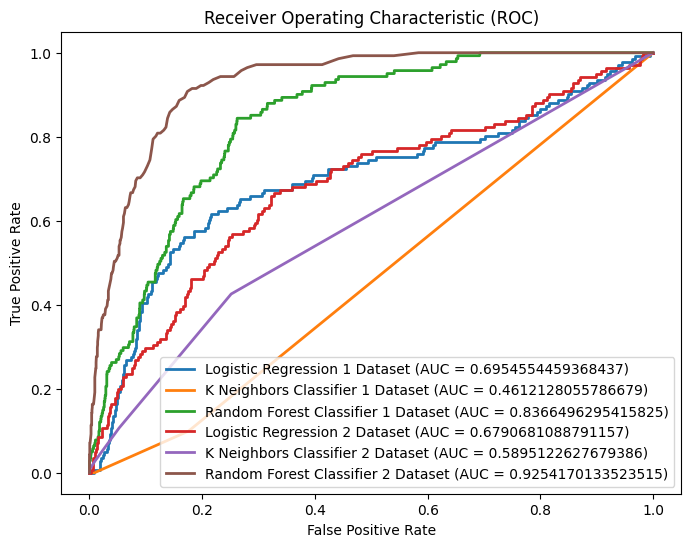

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for model_name, (model, param_grid) in models.items():
    best_model = GridSearchCV(model, param_grid, scoring='f1', cv=5).fit(X_train_1, y_train).best_estimator_

    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_1)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} 1 Dataset (AUC = {roc_auc})')

for model_name, (model, param_grid) in models.items():
    best_model = GridSearchCV(model, param_grid, scoring='f1', cv=5).fit(X_train_2, y_train).best_estimator_

    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_2)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} 2 Dataset (AUC = {roc_auc})')

plt.legend(loc='lower right')

plt.show()

<p class="task" id="9"></p>

### 9
Используя любую из обученных моделей, сделайте предсказания столбца `IsHoliday` для тестового множества и сохраните результат в виде csv файла следующего вида:

```
id,isHoliday
1,0
2,1
...
```

In [ ]:
model = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42)

model.fit(X_train_2, y_train)

test_predictions = model.predict(X_test_2)
test_df = pd.DataFrame({'id': range(1, len(test_predictions) + 1), 'isHoliday': test_predictions})

test_df.to_csv('test_predictions.csv', index=False)

## Обратная связь
- [ ] Хочу получить обратную связь по решению